Madison-Taylor Fortich  
9291000361

### 1) Prepare the data:  
a) Import the libraries  
b) Load the dataset  
c) Split the train set and the test set, with random_state = 0, test_size = 0.2  
d) Apply feature scaling (standard scaler)  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Social_Network_Ads_Classification.csv')
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
x = data.iloc[:, :-1].values 
y = data.iloc[:, -1].values 

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print(X_train)

[[    58 144000]
 [    59  83000]
 [    24  55000]
 [    26  35000]
 [    58  38000]
 [    42  80000]
 [    40  75000]
 [    59 130000]
 [    46  41000]
 [    41  60000]
 [    42  64000]
 [    37 146000]
 [    23  48000]
 [    25  33000]
 [    24  84000]
 [    27  96000]
 [    23  63000]
 [    48  33000]
 [    48  90000]
 [    42 104000]
 [    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  82000]
 [    47  51000]
 [    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  7200

In [5]:
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=10, suppress=True)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)

[[ 1.9229500774  2.1460156583]
 [ 2.0201608239  0.3787192971]
 [-1.3822153005 -0.4324987048]
 [-1.1877938077 -1.0119401347]
 [ 1.9229500774 -0.9250239202]
 [ 0.3675781349  0.2918030826]
 [ 0.173156642   0.1469427251]
 [ 2.0201608239  1.7404066574]
 [ 0.7564211205 -0.8381077057]
 [ 0.2703673885 -0.2876383473]
 [ 0.3675781349 -0.1717500613]
 [-0.1184755972  2.2039598013]
 [-1.4794260469 -0.6353032053]
 [-1.2850045541 -1.0698842777]
 [-1.3822153005  0.4076913686]
 [-1.0905830613  0.7553562265]
 [-1.4794260469 -0.2007221328]
 [ 0.9508426133 -1.0698842777]
 [ 0.9508426133  0.5815237975]
 [ 0.3675781349  0.9871327985]
 [ 0.5619996277 -0.8960518487]
 [-0.6045293292  1.4506859424]
 [-0.0212648508 -0.5773590623]
 [-0.6045293292  1.8852670148]
 [ 1.339685599  -1.4175491356]
 [ 1.4368963454  0.9871327985]
 [ 0.0759458956 -0.8091356342]
 [-0.0212648508 -0.2586662758]
 [-0.2156863436 -0.5773590623]
 [-0.2156863436 -0.2007221328]
 [-0.31289709   -1.3016608497]
 [-0.31289709   -0.5773590623]
 [ 0.367

### 2) Train the models:  
a) Use train set as the input of GridSearchCV to find the best parameters of: (set the
parameter grid as you wish)  
b) Use each model with the best parameters to predict the test set  
  
### 3) Evaluate the model and visualization:
a) Calculate confusion_matrix and classification_report in sklearn.metrics for
training results and test results.  

b) Visualize the result:  
i) Scatter the train result, set the TP, FP, FN, TN in different colors.  
ii) Scatter the test result, set the TP, FP, FN, TN in different colors.  
iii) Visualize the classification boundary of the model, for example:

In [6]:
from sklearn.model_selection import GridSearchCV

1. Logistic Regression Classifier  

In [7]:
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression(random_state=0)
classifier_lr.fit(X_train, y_train)

lr_params = {'C': [0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear']}

grid_search_lr = GridSearchCV(estimator=classifier_lr, param_grid=lr_params, scoring='accuracy', cv=10, n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

best_lr = grid_search_lr.best_estimator_
y_pred_lr_gs = best_lr.predict(X_test)

print("Best Parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Test Set Prediction:", y_pred_lr_gs)

Best Parameters for Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Test Set Prediction: [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1]


In [8]:
from sklearn.metrics import confusion_matrix, classification_report

y_train_pred_log_reg = best_lr.predict(X_train)
y_test_pred_log_reg = best_lr.predict(X_test)

cm_train_log_reg = confusion_matrix(y_train, y_train_pred_log_reg)
cm_test_log_reg = confusion_matrix(y_test, y_test_pred_log_reg)
print(f"Train Confusion Matrix (Logistic Regression):\n{cm_train_log_reg}")
print(f"Test Confusion Matrix (Logistic Regression):\n{cm_test_log_reg}")

print(f"Train Classification Report (Logistic Regression):\n{classification_report(y_train, y_train_pred_log_reg)}")
print(f"Test Classification Report (Logistic Regression):\n{classification_report(y_test, y_test_pred_log_reg)}")

Train Confusion Matrix (Logistic Regression):
[[180  19]
 [ 39  82]]
Test Confusion Matrix (Logistic Regression):
[[56  2]
 [ 5 17]]
Train Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       199
           1       0.81      0.68      0.74       121

    accuracy                           0.82       320
   macro avg       0.82      0.79      0.80       320
weighted avg       0.82      0.82      0.81       320

Test Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        58
           1       0.89      0.77      0.83        22

    accuracy                           0.91        80
   macro avg       0.91      0.87      0.89        80
weighted avg       0.91      0.91      0.91        80



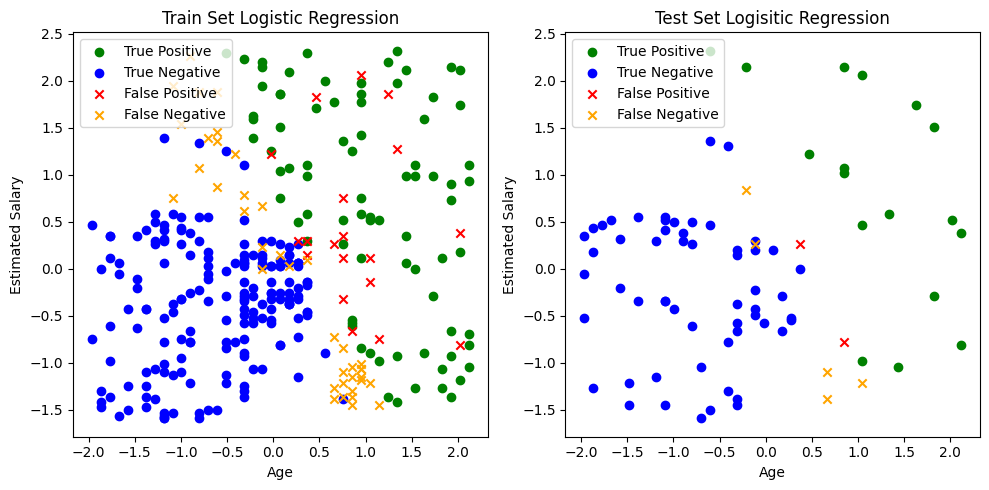

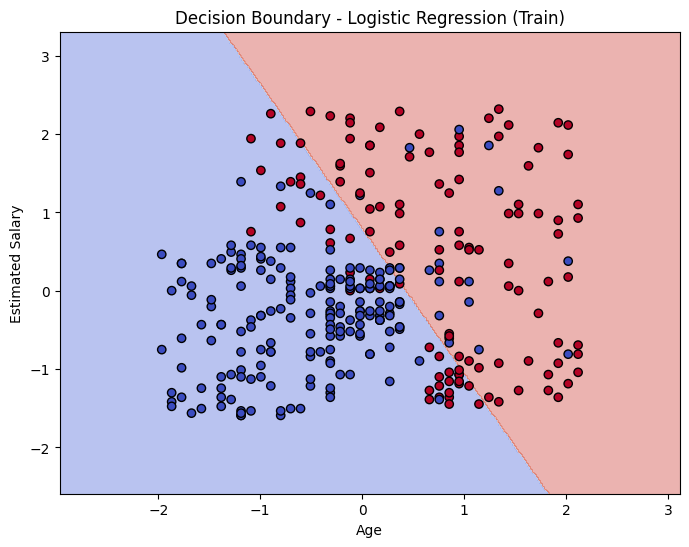

In [9]:
TP_train = (y_train == 1) & (y_train_pred_log_reg == 1)
TN_train = (y_train == 0) & (y_train_pred_log_reg == 0)
FP_train = (y_train == 0) & (y_train_pred_log_reg == 1)
FN_train = (y_train == 1) & (y_train_pred_log_reg == 0)

TP_test = (y_test == 1) & (y_test_pred_log_reg == 1)
TN_test = (y_test == 0) & (y_test_pred_log_reg == 0)
FP_test = (y_test == 0) & (y_test_pred_log_reg == 1)
FN_test = (y_test == 1) & (y_test_pred_log_reg == 0)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train[TP_train, 0], X_train[TP_train, 1], color='green', marker='o', label='True Positive')
plt.scatter(X_train[TN_train, 0], X_train[TN_train, 1], color='blue', marker='o', label='True Negative')
plt.scatter(X_train[FP_train, 0], X_train[FP_train, 1], color='red', marker='x', label='False Positive')
plt.scatter(X_train[FN_train, 0], X_train[FN_train, 1], color='orange', marker='x', label='False Negative')
plt.title("Train Set Logistic Regression")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test[TP_test, 0], X_test[TP_test, 1], color='green', marker='o', label='True Positive')
plt.scatter(X_test[TN_test, 0], X_test[TN_test, 1], color='blue', marker='o', label='True Negative')
plt.scatter(X_test[FP_test, 0], X_test[FP_test, 1], color='red', marker='x', label='False Positive')
plt.scatter(X_test[FN_test, 0], X_test[FN_test, 1], color='orange', marker='x', label='False Negative')
plt.title("Test Set Logisitic Regression")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()

plt.tight_layout()
plt.show()

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = best_lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o', cmap=plt.cm.coolwarm)
plt.title("Decision Boundary - Logistic Regression (Train)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.show()

2. KNN (KNeighborsClassifier)  

In [10]:
from sklearn.neighbors import KNeighborsClassifier

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']}

knn_classifier = KNeighborsClassifier()

grid_search_knn = GridSearchCV(knn_classifier, param_grid_knn, cv=10, n_jobs=-1, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)
print(f"Best KNN Parameters: {grid_search_knn.best_params_}")
print("Test Set Prediction:", y_pred_knn)

Best KNN Parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Test Set Prediction: [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]


In [11]:
y_train_pred_knn = best_knn.predict(X_train)
y_test_pred_knn = best_knn.predict(X_test)

cm_train_knn = confusion_matrix(y_train, y_train_pred_knn)
cm_test_knn = confusion_matrix(y_test, y_test_pred_knn)
print(f"Train Confusion Matrix (KNN):\n{cm_train_knn}")
print(f"Test Confusion Matrix (KNN):\n{cm_test_knn}")

print(f"Train Classification Report (KNN):\n{classification_report(y_train, y_train_pred_knn)}")
print(f"Test Classification Report (KNN):\n{classification_report(y_test, y_test_pred_knn)}")

Train Confusion Matrix (KNN):
[[181  18]
 [ 11 110]]
Test Confusion Matrix (KNN):
[[55  3]
 [ 1 21]]
Train Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       199
           1       0.86      0.91      0.88       121

    accuracy                           0.91       320
   macro avg       0.90      0.91      0.90       320
weighted avg       0.91      0.91      0.91       320

Test Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



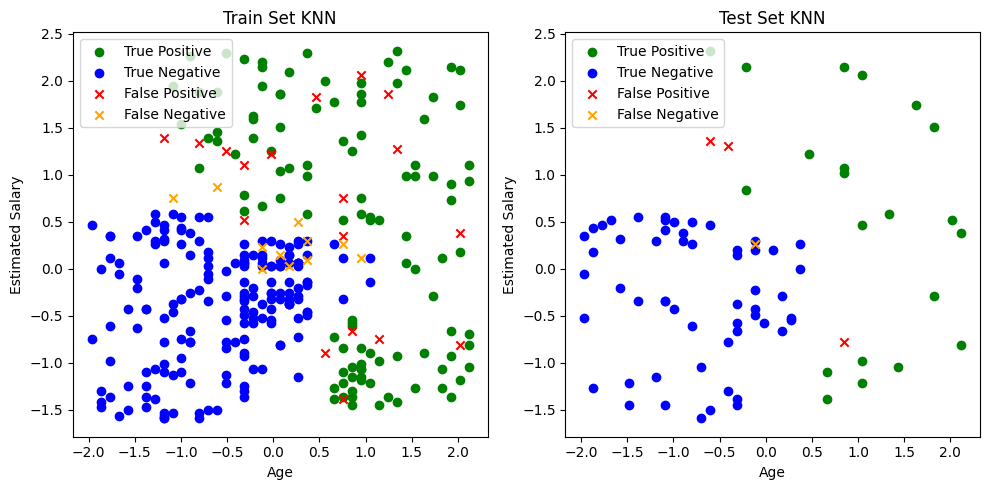

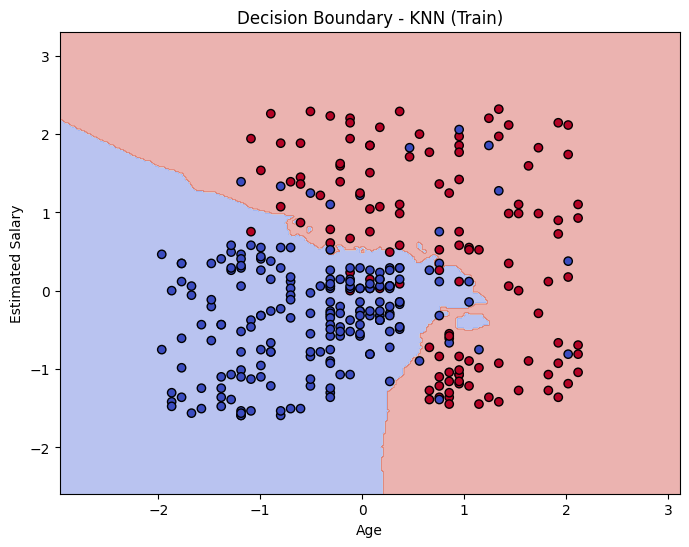

In [12]:
TP_train = (y_train == 1) & (y_train_pred_knn == 1)
TN_train = (y_train == 0) & (y_train_pred_knn == 0)
FP_train = (y_train == 0) & (y_train_pred_knn == 1)
FN_train = (y_train == 1) & (y_train_pred_knn == 0)

TP_test = (y_test == 1) & (y_test_pred_knn == 1)
TN_test = (y_test == 0) & (y_test_pred_knn == 0)
FP_test = (y_test == 0) & (y_test_pred_knn == 1)
FN_test = (y_test == 1) & (y_test_pred_knn == 0)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train[TP_train, 0], X_train[TP_train, 1], color='green', marker='o', label='True Positive')
plt.scatter(X_train[TN_train, 0], X_train[TN_train, 1], color='blue', marker='o', label='True Negative')
plt.scatter(X_train[FP_train, 0], X_train[FP_train, 1], color='red', marker='x', label='False Positive')
plt.scatter(X_train[FN_train, 0], X_train[FN_train, 1], color='orange', marker='x', label='False Negative')
plt.title("Train Set KNN")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test[TP_test, 0], X_test[TP_test, 1], color='green', marker='o', label='True Positive')
plt.scatter(X_test[TN_test, 0], X_test[TN_test, 1], color='blue', marker='o', label='True Negative')
plt.scatter(X_test[FP_test, 0], X_test[FP_test, 1], color='red', marker='x', label='False Positive')
plt.scatter(X_test[FN_test, 0], X_test[FN_test, 1], color='orange', marker='x', label='False Negative')
plt.title("Test Set KNN")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()

plt.tight_layout()
plt.show()

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = best_knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o', cmap=plt.cm.coolwarm)
plt.title("Decision Boundary - KNN (Train)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.show()

3. SVC (svm.LinearSVC)  

In [13]:
from sklearn.svm import LinearSVC
linearSVC = LinearSVC(random_state=0)

param_grid_linear_svc = {
    'C': [0.01, 0.1, 1, 10],
    'max_iter': [1000, 5000]}

grid_search_linear_svc = GridSearchCV(linearSVC, param_grid_linear_svc,cv=10, n_jobs=-1, scoring='accuracy')
grid_search_linear_svc.fit(X_train, y_train)

best_linear_svc = grid_search_linear_svc.best_estimator_
y_pred_linear_svc = best_linear_svc.predict(X_test)
print(f"Best Linear SVC Parameters: {grid_search_linear_svc.best_params_}")
print("Test Set Prediction:", y_pred_linear_svc)

Best Linear SVC Parameters: {'C': 0.01, 'max_iter': 1000}
Test Set Prediction: [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1]


In [14]:
y_train_pred_linear_svc = best_linear_svc.predict(X_train)
y_test_pred_linear_svc = best_linear_svc.predict(X_test)

cm_train_linear_svc = confusion_matrix(y_train, y_train_pred_linear_svc)
cm_test_linear_svc = confusion_matrix(y_test, y_test_pred_linear_svc)
print(f"Train Confusion Matrix (Linear SVC):\n{cm_train_linear_svc}")
print(f"Test Confusion Matrix (Linear SVC):\n{cm_test_linear_svc}")

print(f"Train Classification Report (Linear SVC):\n{classification_report(y_train, y_train_pred_linear_svc)}")
print(f"Test Classification Report (Linear SVC):\n{classification_report(y_test, y_test_pred_linear_svc)}")

Train Confusion Matrix (Linear SVC):
[[182  17]
 [ 39  82]]
Test Confusion Matrix (Linear SVC):
[[57  1]
 [ 5 17]]
Train Classification Report (Linear SVC):
              precision    recall  f1-score   support

           0       0.82      0.91      0.87       199
           1       0.83      0.68      0.75       121

    accuracy                           0.82       320
   macro avg       0.83      0.80      0.81       320
weighted avg       0.83      0.82      0.82       320

Test Classification Report (Linear SVC):
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        58
           1       0.94      0.77      0.85        22

    accuracy                           0.93        80
   macro avg       0.93      0.88      0.90        80
weighted avg       0.93      0.93      0.92        80



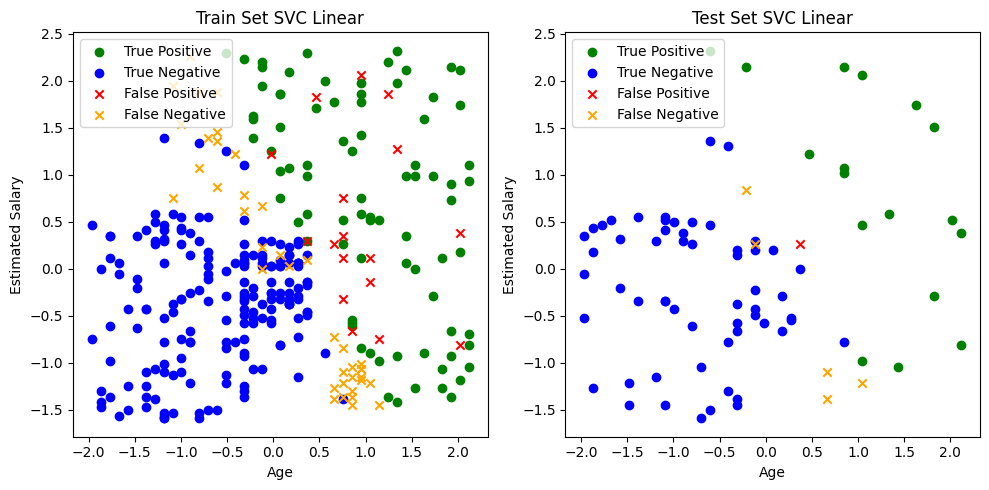

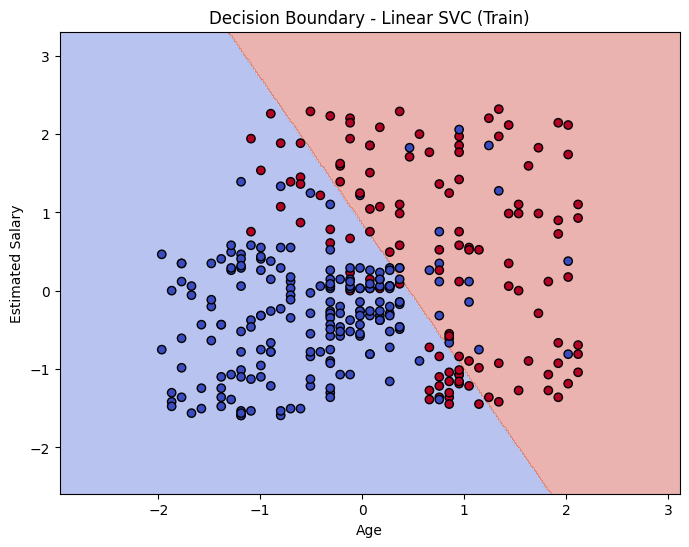

In [15]:
TP_train = (y_train == 1) & (y_train_pred_linear_svc == 1)
TN_train = (y_train == 0) & (y_train_pred_linear_svc == 0)
FP_train = (y_train == 0) & (y_train_pred_linear_svc == 1)
FN_train = (y_train == 1) & (y_train_pred_linear_svc == 0)

TP_test = (y_test == 1) & (y_test_pred_linear_svc == 1)
TN_test = (y_test == 0) & (y_test_pred_linear_svc == 0)
FP_test = (y_test == 0) & (y_test_pred_linear_svc == 1)
FN_test = (y_test == 1) & (y_test_pred_linear_svc == 0)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train[TP_train, 0], X_train[TP_train, 1], color='green', marker='o', label='True Positive')
plt.scatter(X_train[TN_train, 0], X_train[TN_train, 1], color='blue', marker='o', label='True Negative')
plt.scatter(X_train[FP_train, 0], X_train[FP_train, 1], color='red', marker='x', label='False Positive')
plt.scatter(X_train[FN_train, 0], X_train[FN_train, 1], color='orange', marker='x', label='False Negative')
plt.title("Train Set SVC Linear")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test[TP_test, 0], X_test[TP_test, 1], color='green', marker='o', label='True Positive')
plt.scatter(X_test[TN_test, 0], X_test[TN_test, 1], color='blue', marker='o', label='True Negative')
plt.scatter(X_test[FP_test, 0], X_test[FP_test, 1], color='red', marker='x', label='False Positive')
plt.scatter(X_test[FN_test, 0], X_test[FN_test, 1], color='orange', marker='x', label='False Negative')
plt.title("Test Set SVC Linear")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()

plt.tight_layout()
plt.show()

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = best_linear_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o', cmap=plt.cm.coolwarm)
plt.title("Decision Boundary - Linear SVC (Train)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.show()

4. Kernel SVC (svm.SVC)  

In [16]:
from sklearn.svm import SVC

kernel_svc_classifier = SVC(random_state=0)

param_grid_kernel_svc = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['rbf', 'poly'],
    'gamma': ['scale', 'auto']}
grid_search_kernel_svc = GridSearchCV(kernel_svc_classifier, param_grid_kernel_svc, scoring='accuracy', cv=10, n_jobs=-1)
grid_search_kernel_svc.fit(X_train, y_train)

best_kernel_svc = grid_search_kernel_svc.best_estimator_
y_pred_kernel_svc = best_kernel_svc.predict(X_test)
print(f"Best Kernel SVC Parameters: {grid_search_kernel_svc.best_params_}")
print("Test Set Prediction:", y_pred_kernel_svc)

Best Kernel SVC Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Test Set Prediction: [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]


In [17]:
y_train_pred_kernel_svc = best_kernel_svc.predict(X_train)
y_test_pred_kernel_svc = best_kernel_svc.predict(X_test)

cm_train_kernel_svc = confusion_matrix(y_train, y_train_pred_kernel_svc)
cm_test_kernel_svc = confusion_matrix(y_test, y_test_pred_kernel_svc)
print(f"Train Confusion Matrix (Kernel SVC):\n{cm_train_kernel_svc}")
print(f"Test Confusion Matrix (Kernel SVC):\n{cm_test_kernel_svc}")

print(f"Train Classification Report (Kernel SVC):\n{classification_report(y_train, y_train_pred_kernel_svc)}")
print(f"Test Classification Report (Kernel SVC):\n{classification_report(y_test, y_test_pred_kernel_svc)}")

Train Confusion Matrix (Kernel SVC):
[[178  21]
 [  8 113]]
Test Confusion Matrix (Kernel SVC):
[[55  3]
 [ 1 21]]
Train Classification Report (Kernel SVC):
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       199
           1       0.84      0.93      0.89       121

    accuracy                           0.91       320
   macro avg       0.90      0.91      0.91       320
weighted avg       0.91      0.91      0.91       320

Test Classification Report (Kernel SVC):
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



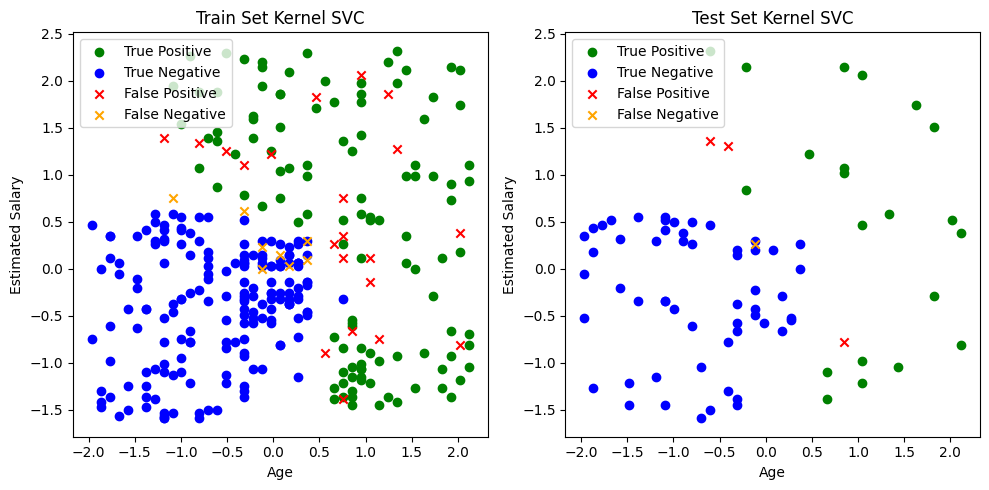

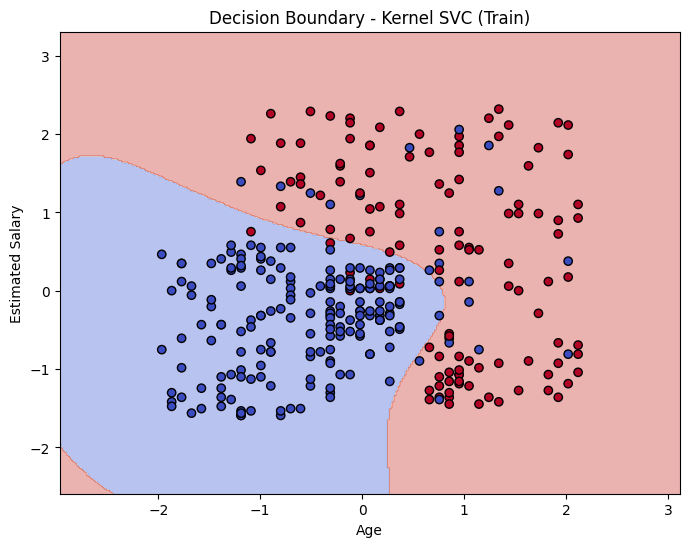

In [18]:
TP_train = (y_train == 1) & (y_train_pred_kernel_svc == 1)
TN_train = (y_train == 0) & (y_train_pred_kernel_svc == 0)
FP_train = (y_train == 0) & (y_train_pred_kernel_svc == 1)
FN_train = (y_train == 1) & (y_train_pred_kernel_svc == 0)

TP_test = (y_test == 1) & (y_test_pred_kernel_svc == 1)
TN_test = (y_test == 0) & (y_test_pred_kernel_svc == 0)
FP_test = (y_test == 0) & (y_test_pred_kernel_svc == 1)
FN_test = (y_test == 1) & (y_test_pred_kernel_svc == 0)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train[TP_train, 0], X_train[TP_train, 1], color='green', marker='o', label='True Positive')
plt.scatter(X_train[TN_train, 0], X_train[TN_train, 1], color='blue', marker='o', label='True Negative')
plt.scatter(X_train[FP_train, 0], X_train[FP_train, 1], color='red', marker='x', label='False Positive')
plt.scatter(X_train[FN_train, 0], X_train[FN_train, 1], color='orange', marker='x', label='False Negative')
plt.title("Train Set Kernel SVC")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test[TP_test, 0], X_test[TP_test, 1], color='green', marker='o', label='True Positive')
plt.scatter(X_test[TN_test, 0], X_test[TN_test, 1], color='blue', marker='o', label='True Negative')
plt.scatter(X_test[FP_test, 0], X_test[FP_test, 1], color='red', marker='x', label='False Positive')
plt.scatter(X_test[FN_test, 0], X_test[FN_test, 1], color='orange', marker='x', label='False Negative')
plt.title("Test Set Kernel SVC")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()

plt.tight_layout()
plt.show()

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = best_kernel_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o', cmap=plt.cm.coolwarm)
plt.title("Decision Boundary - Kernel SVC (Train)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.show()

5. Decision Tree Classifier  

In [19]:
from sklearn.tree import DecisionTreeClassifier
classifier_tree = DecisionTreeClassifier(random_state=0)

param_grid_decision_tree = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]}

grid_search_decision_tree = GridSearchCV(classifier_tree, param_grid_decision_tree, cv=10, n_jobs=-1, scoring='accuracy')
grid_search_decision_tree.fit(X_train, y_train)

best_decision_tree = grid_search_decision_tree.best_estimator_
y_pred_decision_tree = best_decision_tree.predict(X_test)
print(f"Best Decision Tree Parameters: {grid_search_decision_tree.best_params_}")
print("Test Set Prediction:", y_pred_decision_tree)

Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10}
Test Set Prediction: [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1
 0 0 0 0 1 0]


In [20]:
y_train_pred_decision_tree = best_decision_tree.predict(X_train)
y_test_pred_decision_tree = best_decision_tree.predict(X_test)

cm_train_decision_tree = confusion_matrix(y_train, y_train_pred_decision_tree)
cm_test_decision_tree = confusion_matrix(y_test, y_test_pred_decision_tree)
print(f"Train Confusion Matrix (Decision Tree):\n{cm_train_decision_tree}")
print(f"Test Confusion Matrix (Decision Tree):\n{cm_test_decision_tree}")

print(f"Train Classification Report (Decision Tree):\n{classification_report(y_train, y_train_pred_decision_tree)}")
print(f"Test Classification Report (Decision Tree):\n{classification_report(y_test, y_test_pred_decision_tree)}")

Train Confusion Matrix (Decision Tree):
[[194   5]
 [ 13 108]]
Test Confusion Matrix (Decision Tree):
[[55  3]
 [ 6 16]]
Train Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       199
           1       0.96      0.89      0.92       121

    accuracy                           0.94       320
   macro avg       0.95      0.93      0.94       320
weighted avg       0.94      0.94      0.94       320

Test Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        58
           1       0.84      0.73      0.78        22

    accuracy                           0.89        80
   macro avg       0.87      0.84      0.85        80
weighted avg       0.89      0.89      0.88        80



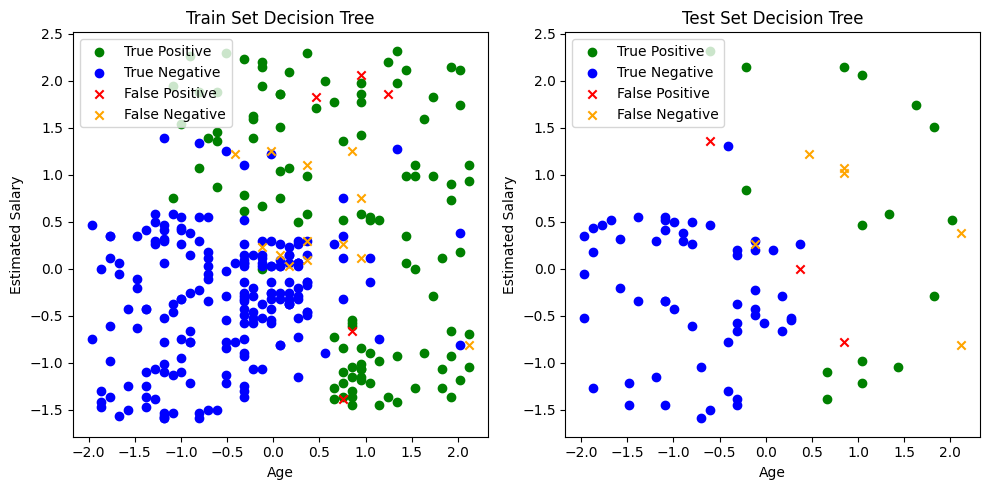

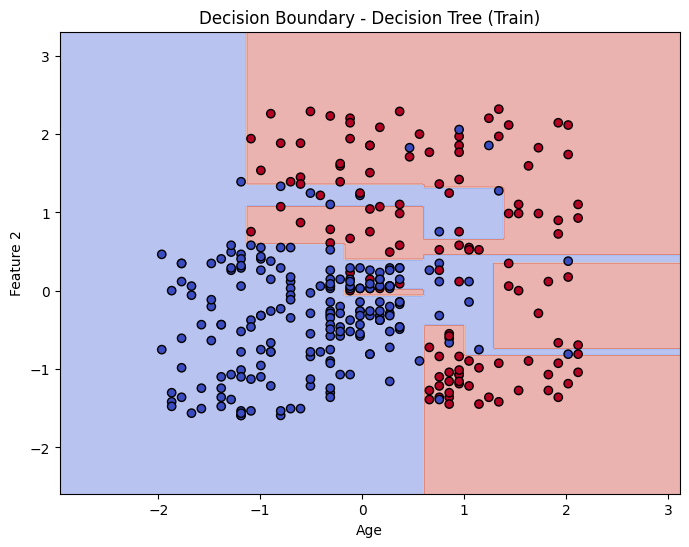

In [21]:
TP_train = (y_train == 1) & (y_train_pred_decision_tree == 1)
TN_train = (y_train == 0) & (y_train_pred_decision_tree == 0)
FP_train = (y_train == 0) & (y_train_pred_decision_tree == 1)
FN_train = (y_train == 1) & (y_train_pred_decision_tree == 0)

TP_test = (y_test == 1) & (y_test_pred_decision_tree == 1)
TN_test = (y_test == 0) & (y_test_pred_decision_tree == 0)
FP_test = (y_test == 0) & (y_test_pred_decision_tree == 1)
FN_test = (y_test == 1) & (y_test_pred_decision_tree == 0)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train[TP_train, 0], X_train[TP_train, 1], color='green', marker='o', label='True Positive')
plt.scatter(X_train[TN_train, 0], X_train[TN_train, 1], color='blue', marker='o', label='True Negative')
plt.scatter(X_train[FP_train, 0], X_train[FP_train, 1], color='red', marker='x', label='False Positive')
plt.scatter(X_train[FN_train, 0], X_train[FN_train, 1], color='orange', marker='x', label='False Negative')
plt.title("Train Set Decision Tree")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test[TP_test, 0], X_test[TP_test, 1], color='green', marker='o', label='True Positive')
plt.scatter(X_test[TN_test, 0], X_test[TN_test, 1], color='blue', marker='o', label='True Negative')
plt.scatter(X_test[FP_test, 0], X_test[FP_test, 1], color='red', marker='x', label='False Positive')
plt.scatter(X_test[FN_test, 0], X_test[FN_test, 1], color='orange', marker='x', label='False Negative')
plt.title("Test Set Decision Tree")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()

plt.tight_layout()
plt.show()

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = best_decision_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o', cmap=plt.cm.coolwarm)
plt.title("Decision Boundary - Decision Tree (Train)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.ylabel("Feature 2")
plt.show()

6. Random Forest Classifier  

In [22]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=0)

rf_params = {'n_estimators': [10, 50, 100, 200], 'criterion': ['gini', 'entropy'], 'max_depth': [10, 20, 30, None], 
             'min_samples_split': [2, 10, 20]}

grid_search_rf = GridSearchCV(estimator=classifier_rf, param_grid=rf_params, scoring='accuracy', cv=10, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

best_rf = grid_search_rf.best_estimator_
y_pred_rf_gs = best_rf.predict(X_test)

print("Best Parameters (Random Forest):", grid_search_rf.best_params_)
print("Test Set Prediction:", y_pred_rf_gs)

Best Parameters (Random Forest): {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
Test Set Prediction: [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]


In [23]:
y_train_pred_random_forest = best_rf.predict(X_train)
y_test_pred_random_forest = best_rf.predict(X_test)

cm_train_random_forest = confusion_matrix(y_train, y_train_pred_random_forest)
cm_test_random_forest = confusion_matrix(y_test, y_test_pred_random_forest)
print(f"Train Confusion Matrix (Random Forest):\n{cm_train_random_forest}")
print(f"Test Confusion Matrix (Random Forest):\n{cm_test_random_forest}")

print(f"Train Classification Report (Random Forest):\n{classification_report(y_train, y_train_pred_random_forest)}")
print(f"Test Classification Report (Random Forest):\n{classification_report(y_test, y_test_pred_random_forest)}")

Train Confusion Matrix (Random Forest):
[[183  16]
 [  7 114]]
Test Confusion Matrix (Random Forest):
[[55  3]
 [ 1 21]]
Train Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       199
           1       0.88      0.94      0.91       121

    accuracy                           0.93       320
   macro avg       0.92      0.93      0.92       320
weighted avg       0.93      0.93      0.93       320

Test Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



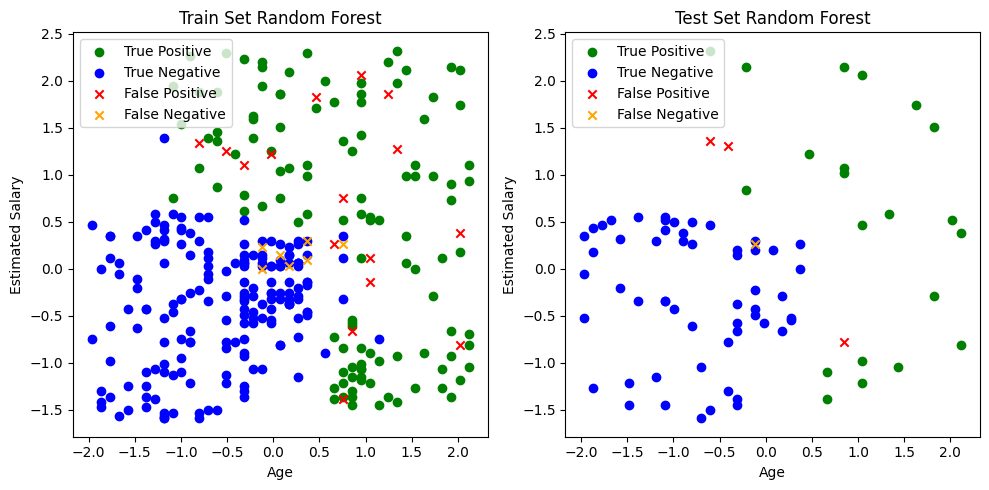

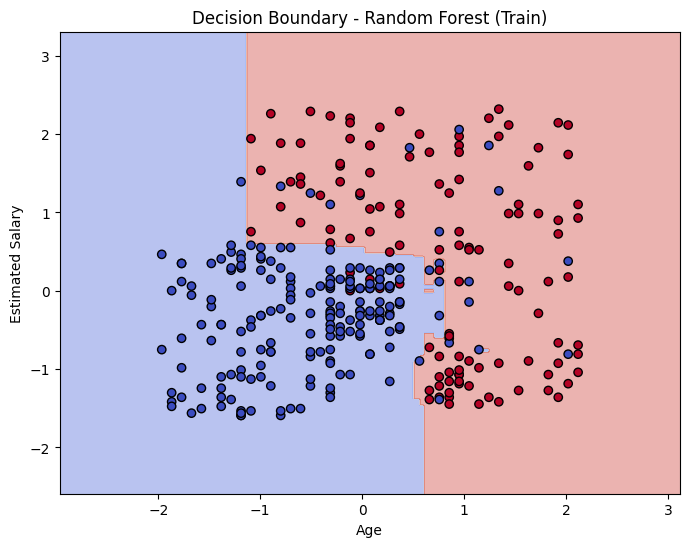

In [24]:
TP_train = (y_train == 1) & (y_train_pred_random_forest == 1)
TN_train = (y_train == 0) & (y_train_pred_random_forest == 0)
FP_train = (y_train == 0) & (y_train_pred_random_forest == 1)
FN_train = (y_train == 1) & (y_train_pred_random_forest == 0)

TP_test = (y_test == 1) & (y_test_pred_random_forest == 1)
TN_test = (y_test == 0) & (y_test_pred_random_forest == 0)
FP_test = (y_test == 0) & (y_test_pred_random_forest == 1)
FN_test = (y_test == 1) & (y_test_pred_random_forest == 0)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train[TP_train, 0], X_train[TP_train, 1], color='green', marker='o', label='True Positive')
plt.scatter(X_train[TN_train, 0], X_train[TN_train, 1], color='blue', marker='o', label='True Negative')
plt.scatter(X_train[FP_train, 0], X_train[FP_train, 1], color='red', marker='x', label='False Positive')
plt.scatter(X_train[FN_train, 0], X_train[FN_train, 1], color='orange', marker='x', label='False Negative')
plt.title("Train Set Random Forest")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test[TP_test, 0], X_test[TP_test, 1], color='green', marker='o', label='True Positive')
plt.scatter(X_test[TN_test, 0], X_test[TN_test, 1], color='blue', marker='o', label='True Negative')
plt.scatter(X_test[FP_test, 0], X_test[FP_test, 1], color='red', marker='x', label='False Positive')
plt.scatter(X_test[FN_test, 0], X_test[FN_test, 1], color='orange', marker='x', label='False Negative')
plt.title("Test Set Random Forest")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()

plt.tight_layout()
plt.show()

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = best_rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o', cmap=plt.cm.coolwarm)
plt.title("Decision Boundary - Random Forest (Train)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.show()

7. Naive Bayes Classifier  

In [25]:
from sklearn.naive_bayes import GaussianNB

classifier_nb = GaussianNB()
nb_params = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

grid_search_nb = GridSearchCV(estimator=classifier_nb, param_grid=nb_params, scoring='accuracy', cv=10, n_jobs=-1)
grid_search_nb.fit(X_train, y_train)

best_nb = grid_search_nb.best_estimator_
y_pred_nb_gs = best_nb.predict(X_test)

print("Best Parameters (Naive Bayes):", grid_search_nb.best_params_)
print("Test Set Prediction:", y_pred_nb_gs)

Best Parameters (Naive Bayes): {'var_smoothing': 1e-09}
Test Set Prediction: [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 1]


In [26]:
y_train_pred_naive_bayes = best_nb.predict(X_train)
y_test_pred_naive_bayes = best_nb.predict(X_test)

cm_train_naive_bayes = confusion_matrix(y_train, y_train_pred_naive_bayes)
cm_test_naive_bayes = confusion_matrix(y_test, y_test_pred_naive_bayes)
print(f"Train Confusion Matrix (Naive Bayes):\n{cm_train_naive_bayes}")
print(f"Test Confusion Matrix (Naive Bayes):\n{cm_test_naive_bayes}")

print(f"Train Classification Report (Naive Bayes):\n{classification_report(y_train, y_train_pred_naive_bayes)}")
print(f"Test Classification Report (Naive Bayes):\n{classification_report(y_test, y_test_pred_naive_bayes)}")

Train Confusion Matrix (Naive Bayes):
[[183  16]
 [ 21 100]]
Test Confusion Matrix (Naive Bayes):
[[55  3]
 [ 4 18]]
Train Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       199
           1       0.86      0.83      0.84       121

    accuracy                           0.88       320
   macro avg       0.88      0.87      0.88       320
weighted avg       0.88      0.88      0.88       320

Test Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        58
           1       0.86      0.82      0.84        22

    accuracy                           0.91        80
   macro avg       0.89      0.88      0.89        80
weighted avg       0.91      0.91      0.91        80



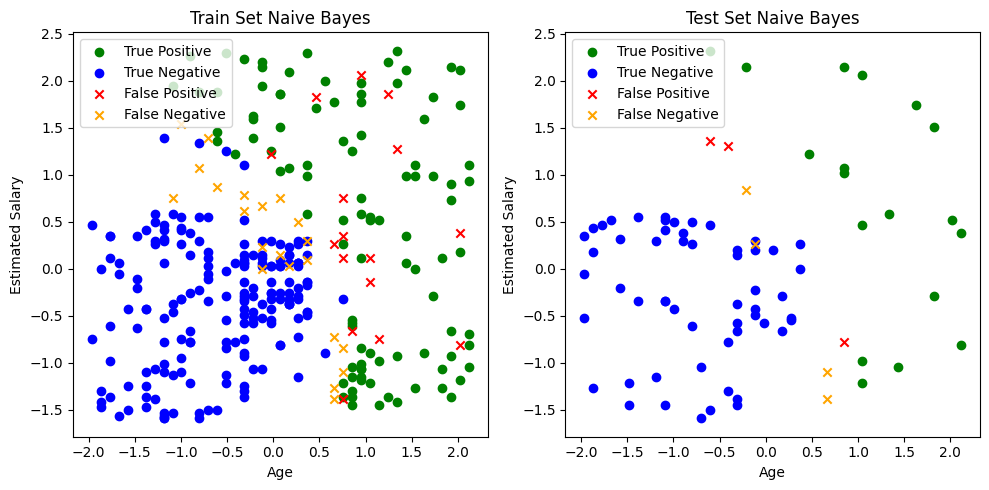

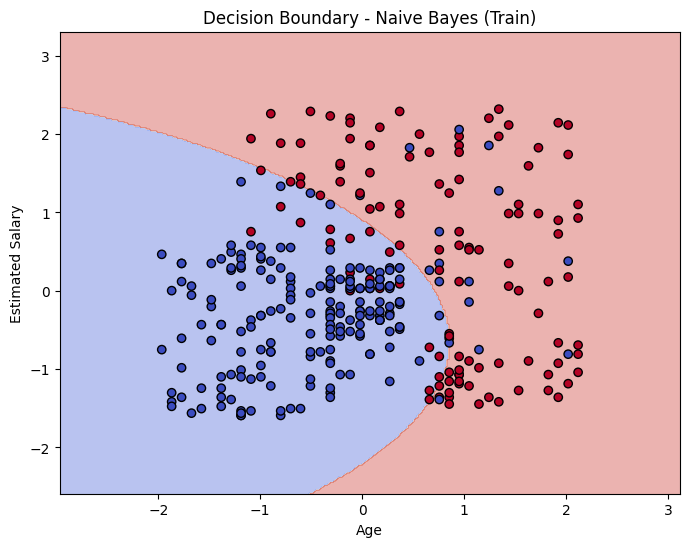

In [27]:
TP_train = (y_train == 1) & (y_train_pred_naive_bayes == 1)
TN_train = (y_train == 0) & (y_train_pred_naive_bayes == 0)
FP_train = (y_train == 0) & (y_train_pred_naive_bayes == 1)
FN_train = (y_train == 1) & (y_train_pred_naive_bayes == 0)

TP_test = (y_test == 1) & (y_test_pred_naive_bayes == 1)
TN_test = (y_test == 0) & (y_test_pred_naive_bayes == 0)
FP_test = (y_test == 0) & (y_test_pred_naive_bayes == 1)
FN_test = (y_test == 1) & (y_test_pred_naive_bayes == 0)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train[TP_train, 0], X_train[TP_train, 1], color='green', marker='o', label='True Positive')
plt.scatter(X_train[TN_train, 0], X_train[TN_train, 1], color='blue', marker='o', label='True Negative')
plt.scatter(X_train[FP_train, 0], X_train[FP_train, 1], color='red', marker='x', label='False Positive')
plt.scatter(X_train[FN_train, 0], X_train[FN_train, 1], color='orange', marker='x', label='False Negative')
plt.title("Train Set Naive Bayes")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test[TP_test, 0], X_test[TP_test, 1], color='green', marker='o', label='True Positive')
plt.scatter(X_test[TN_test, 0], X_test[TN_test, 1], color='blue', marker='o', label='True Negative')
plt.scatter(X_test[FP_test, 0], X_test[FP_test, 1], color='red', marker='x', label='False Positive')
plt.scatter(X_test[FN_test, 0], X_test[FN_test, 1], color='orange', marker='x', label='False Negative')
plt.title("Test Set Naive Bayes")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()

plt.tight_layout()
plt.show()

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = best_nb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o', cmap=plt.cm.coolwarm)
plt.title("Decision Boundary - Naive Bayes (Train)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.show()

8. XGBoost (xgboost.XGBClassifier)  

In [28]:
from xgboost import XGBClassifier

param_grid_xgboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10]
}

xgboost = XGBClassifier()

grid_search_xgboost = GridSearchCV(xgboost, param_grid_xgboost, cv=5, scoring='accuracy')
grid_search_xgboost.fit(X_train, y_train)

best_xgboost = grid_search_xgboost.best_estimator_
y_pred_xgboost = best_xgboost.predict(X_test)
print(f"Best XGBoost Parameters: {grid_search_xgboost.best_params_}")
print("Test Set Prediction:", y_pred_xgboost)

Best XGBoost Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Test Set Prediction: [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]


In [29]:
y_train_pred_xgboost = best_xgboost.predict(X_train)
y_test_pred_xgboost = best_xgboost.predict(X_test)

cm_train_xgboost = confusion_matrix(y_train, y_train_pred_xgboost)
cm_test_xgboost = confusion_matrix(y_test, y_test_pred_xgboost)
print(f"Train Confusion Matrix (XGBoost):\n{cm_train_xgboost}")
print(f"Test Confusion Matrix (XGBoost):\n{cm_test_xgboost}")

print(f"Train Classification Report (XGBoost):\n{classification_report(y_train, y_train_pred_xgboost)}")
print(f"Test Classification Report (XGBoost):\n{classification_report(y_test, y_test_pred_xgboost)}")


Train Confusion Matrix (XGBoost):
[[182  17]
 [  8 113]]
Test Confusion Matrix (XGBoost):
[[55  3]
 [ 1 21]]
Train Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       199
           1       0.87      0.93      0.90       121

    accuracy                           0.92       320
   macro avg       0.91      0.92      0.92       320
weighted avg       0.92      0.92      0.92       320

Test Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



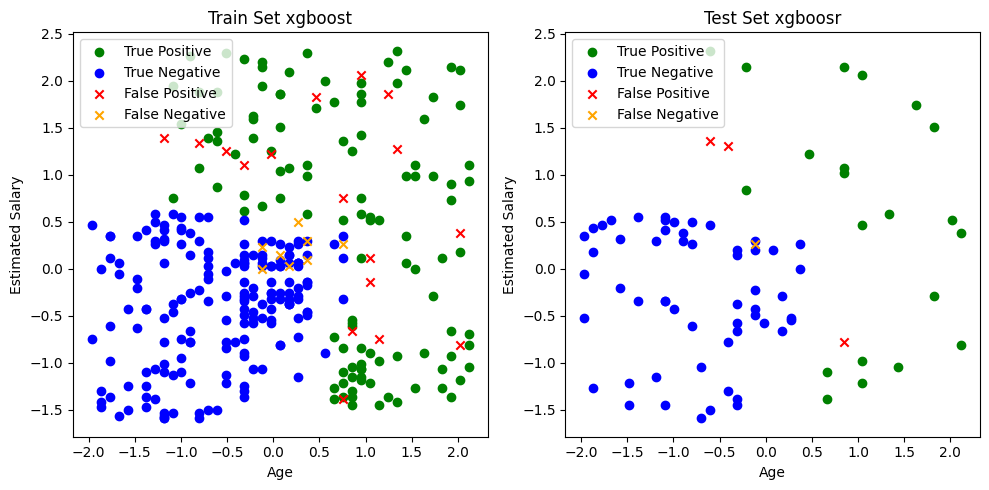

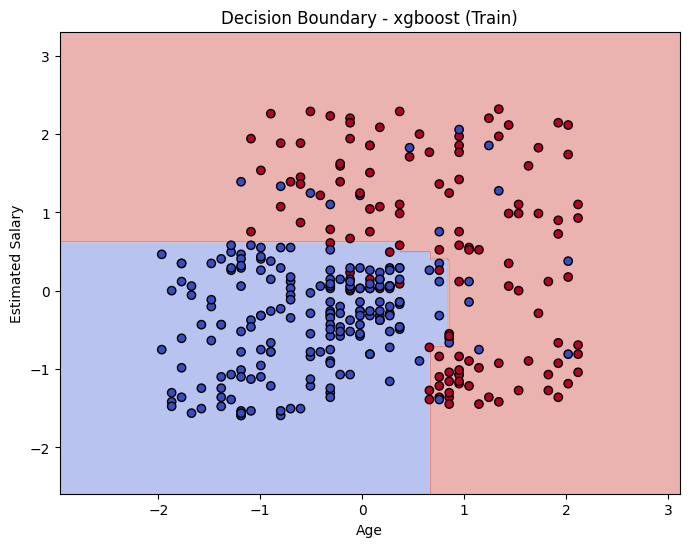

In [30]:
TP_train = (y_train == 1) & (y_train_pred_xgboost == 1)
TN_train = (y_train == 0) & (y_train_pred_xgboost == 0)
FP_train = (y_train == 0) & (y_train_pred_xgboost == 1)
FN_train = (y_train == 1) & (y_train_pred_xgboost == 0)

TP_test = (y_test == 1) & (y_test_pred_xgboost == 1)
TN_test = (y_test == 0) & (y_test_pred_xgboost == 0)
FP_test = (y_test == 0) & (y_test_pred_xgboost == 1)
FN_test = (y_test == 1) & (y_test_pred_xgboost == 0)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train[TP_train, 0], X_train[TP_train, 1], color='green', marker='o', label='True Positive')
plt.scatter(X_train[TN_train, 0], X_train[TN_train, 1], color='blue', marker='o', label='True Negative')
plt.scatter(X_train[FP_train, 0], X_train[FP_train, 1], color='red', marker='x', label='False Positive')
plt.scatter(X_train[FN_train, 0], X_train[FN_train, 1], color='orange', marker='x', label='False Negative')
plt.title("Train Set xgboost")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test[TP_test, 0], X_test[TP_test, 1], color='green', marker='o', label='True Positive')
plt.scatter(X_test[TN_test, 0], X_test[TN_test, 1], color='blue', marker='o', label='True Negative')
plt.scatter(X_test[FP_test, 0], X_test[FP_test, 1], color='red', marker='x', label='False Positive')
plt.scatter(X_test[FN_test, 0], X_test[FN_test, 1], color='orange', marker='x', label='False Negative')
plt.title("Test Set xgboosr")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()

plt.tight_layout()
plt.show()

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = best_xgboost.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o', cmap=plt.cm.coolwarm)
plt.title("Decision Boundary - xgboost (Train)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.show()

9. CatBoost (catboost.CatBoostClassifier)  

In [31]:
from catboost import CatBoostClassifier

param_grid_catboost = {
    'iterations': [100, 200],
    'learning_rate': [0.01, 0.1],
    'depth': [3, 6, 10],
    'verbose': [False]}

catboost = CatBoostClassifier()
grid_search_catboost = GridSearchCV(catboost, param_grid_catboost, cv=5, scoring='accuracy')
grid_search_catboost.fit(X_train, y_train)

best_catboost = grid_search_catboost.best_estimator_
y_pred_catboost = best_catboost.predict(X_test)
print(f"Best Catboost Parameters: {grid_search_catboost.best_params_}")
print("Test Set Prediction:", y_pred_catboost)

Best Catboost Parameters: {'depth': 3, 'iterations': 200, 'learning_rate': 0.01, 'verbose': False}
Test Set Prediction: [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]


In [32]:
y_train_pred_catboost = best_catboost.predict(X_train)
y_test_pred_catboost = best_catboost.predict(X_test)

cm_train_catboost = confusion_matrix(y_train, y_train_pred_catboost)
cm_test_catboost = confusion_matrix(y_test, y_test_pred_catboost)
print(f"Train Confusion Matrix (CatBoost):\n{cm_train_catboost}")
print(f"Test Confusion Matrix (CatBoost):\n{cm_test_catboost}")

print(f"Train Classification Report (CatBoost):\n{classification_report(y_train, y_train_pred_catboost)}")
print(f"Test Classification Report (CatBoost):\n{classification_report(y_test, y_test_pred_catboost)}")

Train Confusion Matrix (CatBoost):
[[179  20]
 [  8 113]]
Test Confusion Matrix (CatBoost):
[[55  3]
 [ 1 21]]
Train Classification Report (CatBoost):
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       199
           1       0.85      0.93      0.89       121

    accuracy                           0.91       320
   macro avg       0.90      0.92      0.91       320
weighted avg       0.92      0.91      0.91       320

Test Classification Report (CatBoost):
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



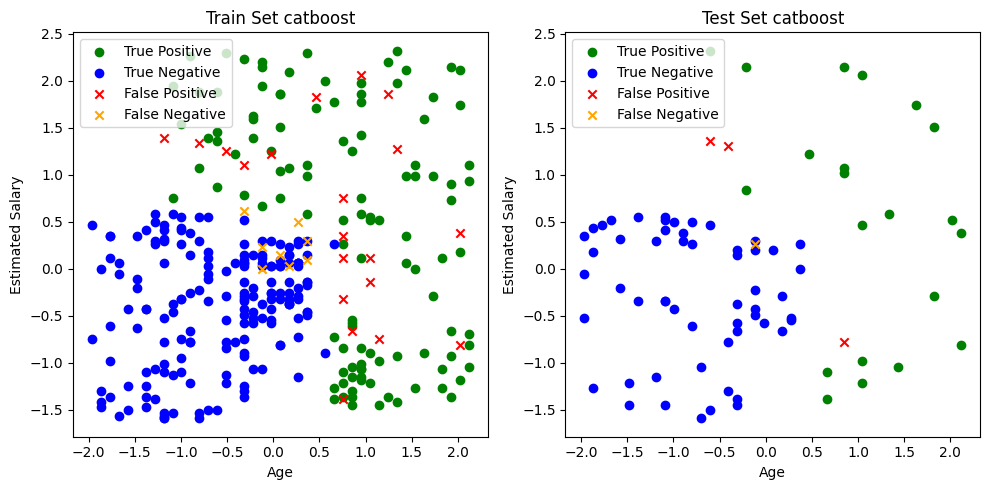

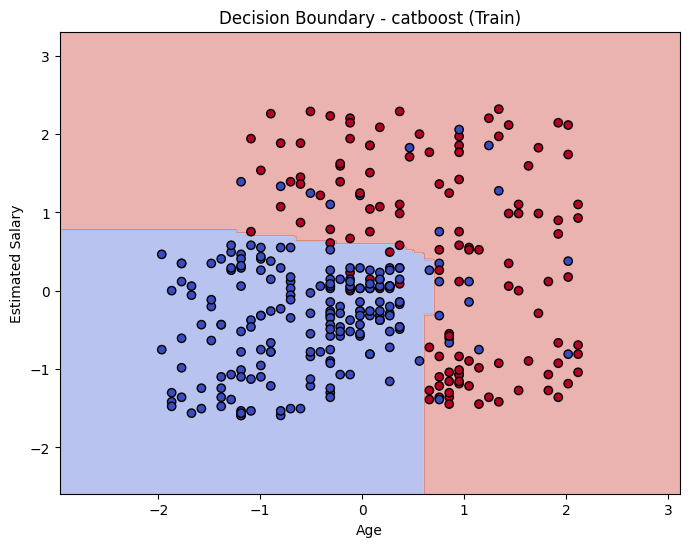

In [33]:
TP_train = (y_train == 1) & (y_train_pred_catboost == 1)
TN_train = (y_train == 0) & (y_train_pred_catboost == 0)
FP_train = (y_train == 0) & (y_train_pred_catboost == 1)
FN_train = (y_train == 1) & (y_train_pred_catboost == 0)

TP_test = (y_test == 1) & (y_test_pred_catboost == 1)
TN_test = (y_test == 0) & (y_test_pred_catboost == 0)
FP_test = (y_test == 0) & (y_test_pred_catboost == 1)
FN_test = (y_test == 1) & (y_test_pred_catboost == 0)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train[TP_train, 0], X_train[TP_train, 1], color='green', marker='o', label='True Positive')
plt.scatter(X_train[TN_train, 0], X_train[TN_train, 1], color='blue', marker='o', label='True Negative')
plt.scatter(X_train[FP_train, 0], X_train[FP_train, 1], color='red', marker='x', label='False Positive')
plt.scatter(X_train[FN_train, 0], X_train[FN_train, 1], color='orange', marker='x', label='False Negative')
plt.title("Train Set catboost")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test[TP_test, 0], X_test[TP_test, 1], color='green', marker='o', label='True Positive')
plt.scatter(X_test[TN_test, 0], X_test[TN_test, 1], color='blue', marker='o', label='True Negative')
plt.scatter(X_test[FP_test, 0], X_test[FP_test, 1], color='red', marker='x', label='False Positive')
plt.scatter(X_test[FN_test, 0], X_test[FN_test, 1], color='orange', marker='x', label='False Negative')
plt.title("Test Set catboost")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()

plt.tight_layout()
plt.show()

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = best_catboost.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o', cmap=plt.cm.coolwarm)
plt.title("Decision Boundary - catboost (Train)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.show()

### c) Compare the performances of those models and write a brief report.

Based on the confusion matrices and classification reports, I came to a few conclusions:
- KNN, Kernel SVC, Random Forest, XGBoost, and CatBoost all had a 95% accuracy on the test set  
- Random Forest had a 94% accuracy on the training set, but went down to 89% on the test set, which could mean overfitting.  
- Naive Bayes is at 91% accuracy and Linear SVS is at 93% which is good but not as good as the others  
- xgboost and catboost would be the best models to use with their great performances across all metrics and flexibility